# Distributing poles and zeros for All-pass filters

In [1]:
from scipy import signal
import numpy as np
import matplotlib.pyplot as plt


plt.rcParams['figure.figsize'] = (20, 8)
plt.rcParams['axes.grid'] = True
                                  
                                  
from dsp import simplify_biquad_filters
import dsp

In [2]:

def allpass(r, w):
    """ Create second order all pass filter.

    r : float [0-1]
    w : float [0-π]

        (z - r*exp(j*w))(z - r*exp(-j*w))
    H = ---------------------------------
        (z - r*exp(j*w))(z - r*exp(-j*w))
    
    returns AtypeSOS
    """
    a = -r*np.exp(1j*w)
    b = -r*np.exp(-1j*w)
    c = -r*np.exp(1j*w)
    d = -r*np.exp(-1j*w)
    sos = dsp.StandardSOS(np.real(a*b), np.real(a+b), 1.0,
                    1.0, np.real(c+d), np.real(c*d))
    return sos

def distribute_all_pass_stages(N, r, w_max, w_min=0):
    """ Create N SOS all pass filters by distributing the poles and 
    zeros through the frequency band (w_min, w_max)

    N : int
    number of second order stages

    w_max : float
    maximum frequeny as normalized frequency (1 = Nyquist Frequency)

    w_min : float
    minimum frequency

    returns list of AtypeSOS filter sections
    """
    stages = []
    for i in range(1,N+1):
        w = w_min*np.pi + (w_max-w_min)/(N+1) * i*np.pi
        c = allpass(r, w)
        stages.append(c)
    return stages

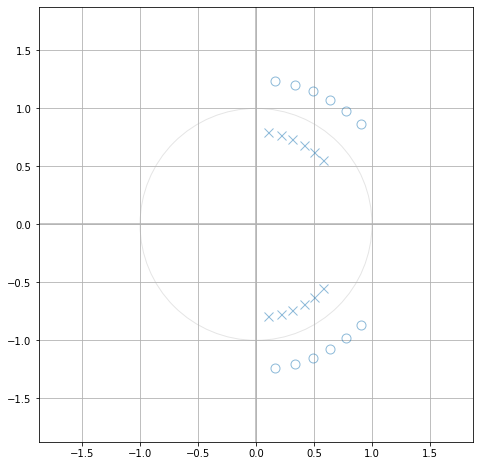

In [3]:
all_pass = distribute_all_pass_stages(6, 0.8, 0.5, 0.2)
z,p,k = signal.sos2zpk(all_pass)

# Create zero-pole plot
fig = plt.figure()
ax = fig.gca()
dsp.zplane(z, p, ax)


In [5]:
all_pass

[StandardSOS(b0=0.6400000000000001, b1=-1.1564717821238266, b2=1.0, a0=1.0, a1=-1.1564717821238266, a2=0.6400000000000001),
 StandardSOS(b0=0.64, b1=-0.9975836829739738, b2=1.0, a0=1.0, a1=-0.9975836829739738, a2=0.64),
 StandardSOS(b0=0.6400000000000001, b1=-0.8206388438494501, b2=1.0, a0=1.0, a1=-0.8206388438494501, a2=0.6400000000000001),
 StandardSOS(b0=0.6399999999999999, b1=-0.6288400506462779, b2=1.0, a0=1.0, a1=-0.6288400506462779, a2=0.6399999999999999),
 StandardSOS(b0=0.64, b1=-0.4256589529066803, b2=1.0, a0=1.0, a1=-0.4256589529066803, a2=0.64),
 StandardSOS(b0=0.6399999999999999, b1=-0.21477322530824883, b2=1.0, a0=1.0, a1=-0.21477322530824883, a2=0.6399999999999999)]

In [23]:
k

0.068719476736